In [24]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
data = pandas.read_csv('cost_revenue_clean.csv')

In [26]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [14]:
X = DataFrame(data, columns = ['production_budget_usd'])
y = DataFrame(data, columns = ['worldwide_gross_usd'])

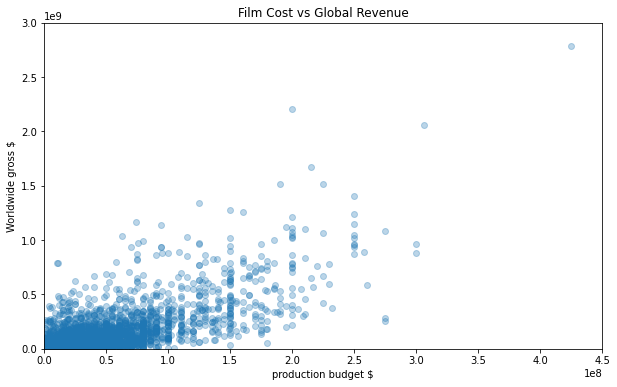

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('production budget $')
plt.ylabel('Worldwide gross $')
plt.ylim(0, 3000000000)
plt.xlim(0,450000000)
plt.show()

In [27]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Slope Coefficient:

In [28]:
regression.coef_ #theta_1

array([[3.11150918]])

In [30]:
# Intercept
regression.intercept_

array([-7236192.72913963])

this intercept is telling us that a movie with a budget of zero would lose over 7 million dollars, that's a bit problematic, this is unrealistic.

Well it means that we should actually take it with a grain of salt.

We just have to accept that our model is a dramatic simplification of the real world.
And as such we should be a little bit careful on how much we believe the predictions of our model, especially at the extreme ends.

But, how do we know if it's accurate?

How can we measure how good our model is?

So even though it is very very simplistic we can still ask the question of how much of the real world data it actually explains.

And for that we need some kind of measure.

We need some kind of statistic and the measure that we're going to look at is called R squared.

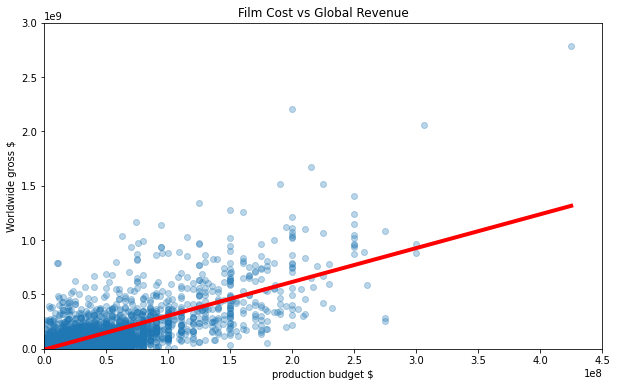

In [32]:
plt.figure(figsize = (10,6)) #zooming the graph
plt.scatter(X,y, alpha = 0.3) #shifting in color of dots
plt.plot(X, regression.predict(X), color = 'red', linewidth = 4) # using predicted value from our regression and we can get hold of those values by calculating a predicted value for each of the X values.
plt.title('Film Cost vs Global Revenue')
plt.xlabel('production budget $')
plt.ylabel('Worldwide gross $')
#after zooming  there was gap on x-axis and y-axis, so to minimize put limits
plt.ylim(0, 3000000000) 
plt.xlim(0,450000000)
plt.show()

In [33]:
regression.score(X, y) #r squared (r^2)

0.5496485356985727

This number here is the amount of variation in film revenue that is explained by the film's budget.
And I got to say that 55 percent is actually pretty good because think about it this way are very simplistic model with a single feature, namely the production budget, can explain around 55 percent of the variation that we see in worldwide movie earnings.
I'd say that's pretty good news for a first try but, of course, we should be a little bit cautious reading into this model too much